<a href="https://colab.research.google.com/github/caninecrew/hw_5/blob/main/HW_5_DS4220_Samuel_Rumbley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1></h1>
<center>
 <h1><font face="Verdana" color="steelblue">Homework 5</font></h1>
 <h2><font face="Verdana" color="steelblue">Time Series Forecasting: E-commerce Sales Analysis</font></h2>
</center>

---

<h3><font face="Verdana">DS4220: Advanced Business Analytics</font></h3>
<p><font face="Verdana"><b>Student:</b> Samuel Rumbley</font></p>
<p><font face="Verdana"><b>Instructor:</b> Dr. Baidoo</font></p>
<p><font face="Verdana"><b>Date:</b> December 4, 2025</font></p>

## **Part 1**: Exponential Smoothing Methods (25 points)

---



E-commerce businesses require accurate sales forecasting for inventory management, staffing decisions, and revenue planning. Apply exponential smoothing techniques to model daily sales patterns and generate forecasts
for business planning.

### **1.1** Load the e-commerce sales dataset and create a proper time series object using the daily_sales variable. Plot the data and describe the key patterns you observe (trend, seasonality, level changes, any notable business events). **(8 points)**

In [29]:
# # Load required libraries
# install.packages("forecast")

# library(forecast)
# library(ggplot2)
library(dplyr)

# Turn off scientific notation
options(scipen = 999)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




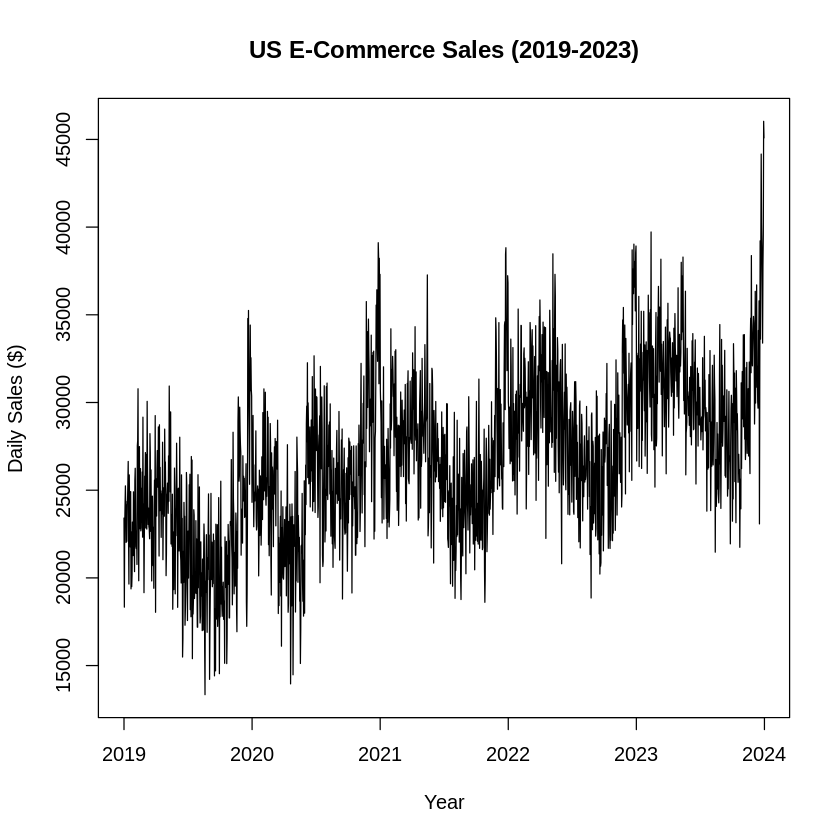

In [25]:
# Load sales production data
sales_data <- read.csv("https://raw.githubusercontent.com/caninecrew/hw_5/refs/heads/main/hw5_ecommerce_sales.csv", stringsAsFactors=FALSE)
sales_data$date <- as.Date(sales_data$date, format = "%m/%d/%Y")
sales_daily <- ts(sales_data$daily_sales, start = c(2019, 1), frequency = 365.25)

# Time series visualization
plot.ts(sales_daily, main = "US E-Commerce Sales (2019-2023)", ylab = "Daily Sales ($)", xlab = "Year")

#### Key Patterns Observed
The US E-Commerce Sales data show an upward trend between 2019 and 2024. The number of sales increases each year, showing growth in online business long term. The patterns show an annual seasonality pattern and likely show a daily or weekly seasonality pattern since there is both short and long term seasonality. There is a large incrrease around the middle of 2020, likely due to the COVID-19 period and the increased use of ecommerce in the United States. Notable Business Events include Black Friday, Cyber Monday, and Christmas shopping.


### **1.2** Apply Simple Exponential Smoothing to the daily sales data. Generate 30-day forecasts and interpret the results. What type of sales patterns is this method best suited for? **(8 points)**

Warning message in ets(x, "ANN", alpha = alpha, opt.crit = "mse", lambda = lambda, :
“Non-integer seasonal period. Only non-seasonal models will be considered.”


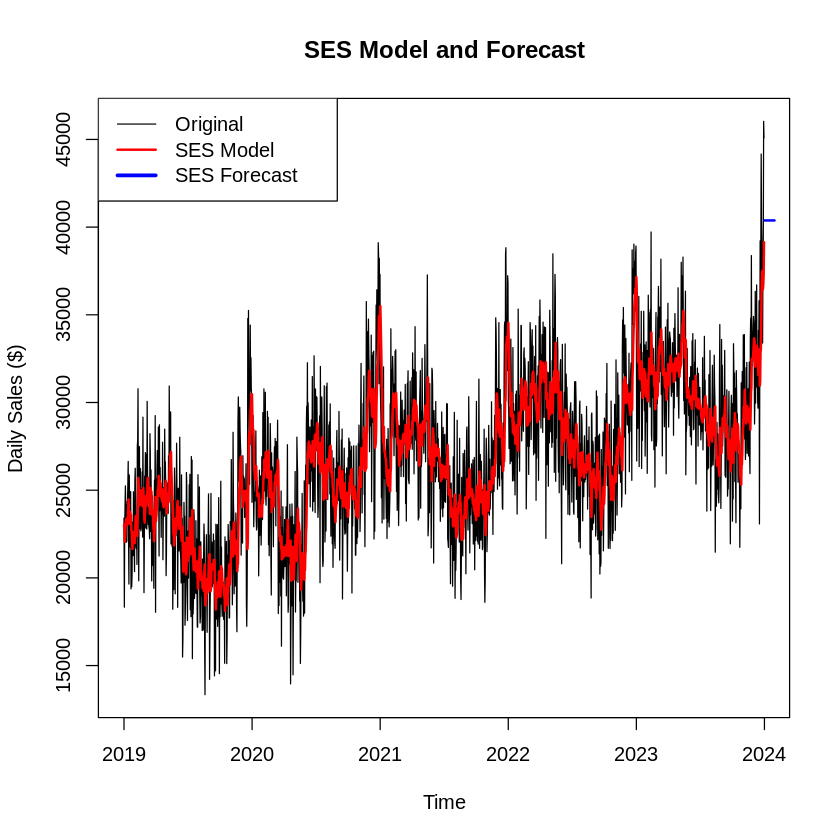

In [26]:
# Simple Exponential Smoothing
ses_forecast <- ses(sales_daily, h=30)

# Plotting the ses model
plot(sales_daily, main="SES Model and Forecast", ylab="Daily Sales ($)", col="black")
lines(fitted(ses_forecast), col="red", lwd=2)
lines(ses_forecast$mean, col="blue", lwd=2)
legend("topleft", legend=c("Original", "SES Model", "SES Forecast"), col=c("black", "red", "blue"), lwd=c(1, 2, 3))

Simple Exponential Smoothing is best suited for stable data that does not include seasonality or trends.

### **1.3** Apply Holt-Winters exponential smoothing (both additive and multiplicative seasonality) to capture seasonal patterns in daily sales. Compare the forecasts from both approaches and explain which performs better for this e-commerce dataset. **(9 points)**

In [58]:
sales_data$daily_sales <- as.numeric(sales_data$daily_sales) # makes the data numeric

monthly_avg <- sales_data %>%
  group_by(year, month) %>% # put each month and year together
  summarise(avg_sales = mean(daily_sales, na.rm = TRUE), .groups = "drop") # finds the mean of sales for each entire month

sales_monthly <- ts(monthly_avg$avg_sales, start = c(2019, 1), frequency = 12)

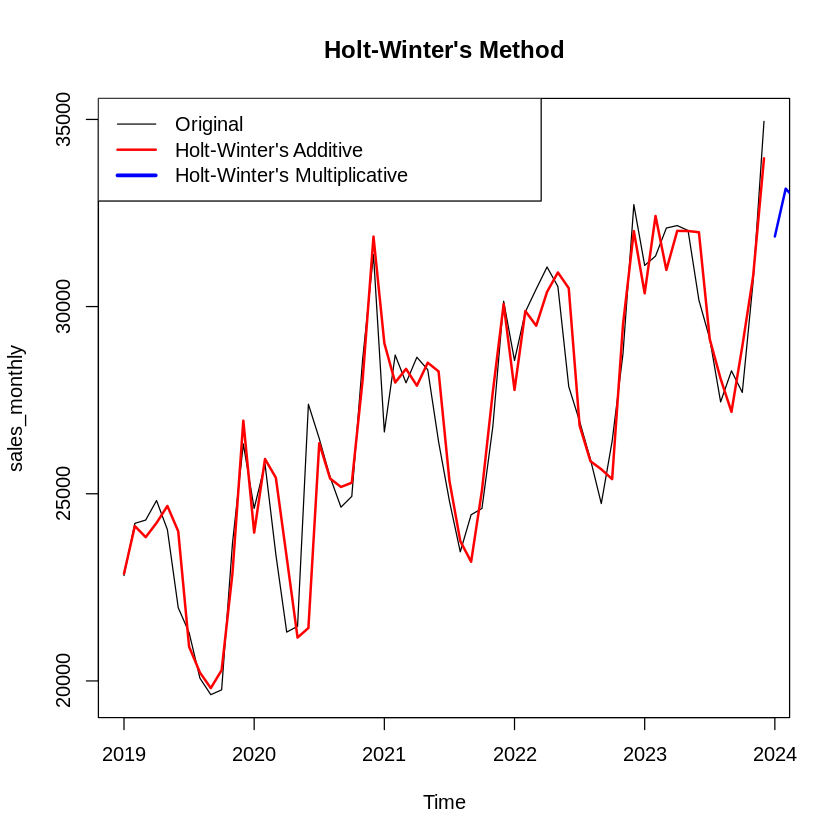

In [57]:
# Holt-Winter's Model (Triple Exponential Smoothing Model)
# Additive Seasonal element - seasonal effects remain constant over time
hw_additive <- hw(sales_monthly, seasonal="additive", h=12)

# multiplicative Seasonal element - seasonal effects remain proportional to data
hw_multiplicative <- hw(sales_monthly, seasonal="multiplicative", h=12)

# Plotting the series
plot(sales_monthly, main="Holt-Winter's Method")
lines(fitted(hw_additive), col='red', lwd=2)
lines(hw_multiplicative$mean, col="blue", lwd=2)
legend("topleft", legend=c("Original", "Holt-Winter's Additive", "Holt-Winter's Multiplicative"), col=c("black", "red", "blue"), lwd=c(1, 2, 3))

## **Part 2**: Stationarity Analysis and Data Preparation (20 points)

---

ARIMA models require stationary data for reliable parameter estimation. Analyze the stationarity properties of
the daily sales series and apply appropriate transformations.

**Tasks:**
* **2.1** Test the daily sales series for stationarity using appropriate diagnostic tools. Interpret the results and explain
why stationarity matters for ARIMA modeling of sales data. **(8 points)**
* **2.2** Apply differencing transformations to achieve stationarity. Show both first differencing and seasonal
differencing results (consider weekly seasonality for daily data). Which approach is more effective for this sales
dataset? Justify your answer with evidence. **(12 points)**

## **Part 3**: ACF/PACF Analysis and ARIMA Parameter Identification (25 points)



---



Use autocorrelation analysis to identify appropriate ARIMA model parameters for the daily sales data.

**Tasks:**
* 3.1 Generate ACF and PACF plots for the stationary daily sales data. Display both the plots and the numerical
correlation values for the first 10 lags. **(10 points)**
* 3.2 Interpret the ACF and PACF patterns to suggest appropriate ARIMA parameters (p, d, q). Use the statistical
significance thresholds to justify your parameter recommendations. Show the code that automatically suggests
these parameters. **(10 points)**
* 3.3 Explain the business meaning of the suggested ARIMA parameters in the context of e-commerce sales
forecasting. What do the autoregressive and moving average components tell us about sales dependencies and
customer behavior patterns? **(5 points)**



## **Part 4**: ARIMA Model Building and Forecasting (20 points)

---



Build ARIMA models using both automatic and manual parameter selection, then generate forecasts for
business planning.

**Tasks:**
* **4.1** Fit an ARIMA model using automatic parameter selection. Display the model summary and interpret the
selected parameters (p,d,q). What does this tell us about the daily sales time series structure? (8 points)
* **4.2** Generate 30-day forecasts using the fitted ARIMA model. Create forecast plots with confidence intervals and extract the specific forecast values. (7 points)
* **4.3** Interpret the ARIMA forecasts in a business context. How would e-commerce managers use these sales forecasts for inventory planning, marketing budget allocation, and staffing decisions? What are the limitations of these predictions? (5 points)


**Part 5**: Model Comparison and Business Recommendations (10 points)
---



Compare the forecasting performance of exponential smoothing and ARIMA approaches to provide business recommendations.

**Tasks:**
* **5.1** Compare the forecasts from Holt-Winters exponential smoothing and ARIMA models for the same 30-day
period. Which method provides more realistic forecasts for daily sales? Consider the business context of e-
commerce seasonality. (5 points)
* **5.2** Based on your analysis, recommend the most appropriate forecasting method for e-commerce sales
planning. Consider both accuracy and interpretability in your recommendation. Provide specific business
justification for your choice and discuss how this would impact inventory management and marketing
decisions. (5 points)

## **Assignment Information**

---

The e-commerce daily sales dataset contains comprehensive daily business metrics for an online retail company. This dataset includes sales revenue, customer behavior, marketing activities, economic indicators, and operational metrics that influence daily sales performance.

### Key Variables for Time Series Analysis:
1. **date**: Daily date observations (time series index)
2. **daily_sales**: Daily sales revenue in dollars (primary target variable)
3. **year**, **month**, **quarter**: Time period indicators for seasonal analysis
4. **day_of_week**: Day of week for weekly seasonality paterns
5. **is_weekend**: Weekend indicator for business cycle effects

**Note**: While the dataset contains many external variables (marketing spend, weather, economic indicators), this
assignment focuses on univariate time series analysis using only the daily_sales variable and time components,
consistent with our Sessions 1-2 course material.


### Grading Criteria
* **Code Quality (20%)**: Well-commented, clean R code that runs without errors
* **Technical Analysis (40%)**: Correct implementation of time series methods and proper interpretation of
statistical results
* **Business Insights (25%)**: Meaningful interpretation of results in business context with practical
recommendations
* **Communication (15%)**: Clear explanations, proper formatting, and professional presentation

### Tips for Success:
* Use the forecast package for exponential smoothing and ARIMA functions
* Remember to create proper time series objects with correct frequency (daily = 365.25 or weekly = 7)
* Always interpret statistical results in e-commerce business context
* Include forecast plots with appropriate titles and labels
* Explain your recommendations clearly with supporting evidence